#**SENTIMENTAL ANALYSIS WITH AMAZON REVIEWS**

The sample dataset was collected which was based in customer product reviews.

In [ ]:
#Import the required libraries

!pip install openpyxl
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_excel('review-details.xlsx')
df.head(10)

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,5,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,4,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,2019-01-03,FRESHAMAZON,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,5,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,2019-01-03,FRESHAMAZON,8717163536476,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,2019-01-02,5,...,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae
5,2019-01-04,AMAZONPRIMEPANTRY,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,4,...,Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,573f07c3-5ec1-63df-bcaf-47dc8347d799
6,2019-01-04,AMAZONPRIMEPANTRY,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,...,Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,3f0c3287-6197-dd68-9669-c9e6eafbf037
7,2019-01-04,AMAZONPRIMEPANTRY,8712566479726,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,2019-01-02,5,...,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,91df7f82-f0be-e0fb-4726-9ca54ec408d5
8,2019-01-06,FRESHAMAZON,8718114216324,B0151I60Z4,Dove Men+Care,Personal Care,Deodorants & Fragrances,Dove Men+Care Clean Comfort Aerosol Anti-pers...,2019-01-05,4,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,False,0,a089640c-9496-a786-4e3e-f8a9df03c4d7
9,2019-01-07,FRESHAMAZON,8712566479368,B014DFKXKY,Knorr,Foods,Savoury,Knorr Chicken Stock Pot 8 x 28g,2019-01-06,5,...,Chicken Stock/Pots/Cubes/Extract/Liquid/Concen...,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,1aa09e1d-b936-0e8c-e56d-73229c2d10c1


#DATA CLEANING


In [ ]:
df.head(2)

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,2019-01-02,FRESHAMAZON,8718114216478,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,2019-01-01,5,...,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,2019-01-03,FRESHAMAZON,5000184201199,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,2019-01-02,5,...,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   report_date             2501 non-null   datetime64[ns]
 1   online_store            2501 non-null   object        
 2   upc                     2501 non-null   int64         
 3   retailer_product_code   2501 non-null   object        
 4   brand                   2501 non-null   object        
 5   category                2501 non-null   object        
 6   sub_category            2501 non-null   object        
 7   product_description     2501 non-null   object        
 8   review_date             2501 non-null   datetime64[ns]
 9   review_rating           2501 non-null   int64         
 10  review_title            2403 non-null   object        
 11  review_text             2501 non-null   object        
 12  is_competitor           2501 non-null   int64   

5    1848
4     319
1     146
3     107
2      81
Name: review_rating, dtype: int64


<Axes: >

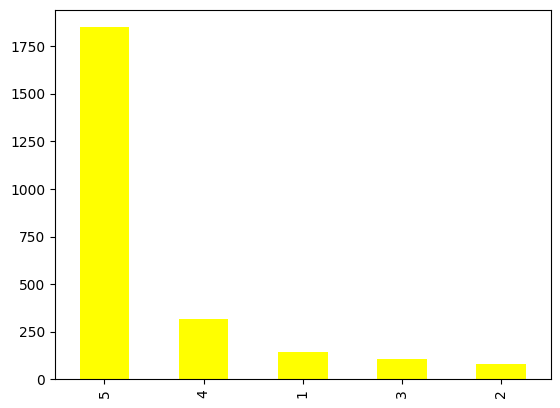

In [ ]:
print(df['review_rating'].value_counts())
df['review_rating'].value_counts().plot.bar(color='yellow')

In [ ]:
df.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title                98
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i

In [ ]:
df = df.dropna()

In [ ]:
df['sentiments'] = df['review_rating'].apply(lambda x: 0 if x == [1, 2] else 1)
df.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,...,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id,sentiments


In [ ]:
# Dependent Features
y = df['sentiments']

# Independent Features
X = df.drop('sentiments', axis=1)

In [ ]:
#Make a copy of data set for emergency
messages = X.copy()
messages = messages.reset_index()   ## we reset the index because above we drop the nan values because of this the index will be disturb

#NLP implemntation

Step 1: Stemming the words

In [ ]:
#Changing words to root words
import nltk
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['review_text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1]

IndexError: ignored

In [ ]:
#Now tokenize the dataset
voc_size = 15000
max_length = 120
embedding_dim = 16

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=voc_size, oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)

In [ ]:
sequences = tokenizer.texts_to_sequences(corpus)

embedded_docs = pad_sequences(sequences, maxlen=max_length, padding='post', truncating= 'post')

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
X_final.shape, y_final.shape

((0, 120), (0,))

In [ ]:
model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           240000    
                                                                 
 lstm (LSTM)                 (None, 100)               46800     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 295,377
Trainable params: 295,377
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True